# Hierarchical Model

In the previous reading, we have on `k-means`, which is a centroid-based clustering model. In this reading, we will explore another category of clustering models called **hierarchical models**.
Similar to the previous walkthrough , we will create our sample with "make_blobs" function

In [1]:
# import libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# Generate clusters 
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)


def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()


## Hierarchical clustering

_Hierarchical clustering_ is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or a dendrogram). The root of the tree is the unique cluster that gathers all the samples, with the leaves being the clusters with only one sample.

We will focus on `Agglomerative clustering`.
It performs a hierarchical clustering using a bottom-up approach: each observation starts in its own cluster, and the clusters are successively merged together.



In [10]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

# create an object
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 3)


In the code above, we created an `AgglomerativeClustering` object. We set the Euclidean distance to the `affinity` parameter and set the number of clusters to three. We also set the `linkage` parameter to the "`ward`". The linkage criteria determine the metric used for the merge strategy:

<p>The Euclidean distance between two points P and Q in a two-dimensional space is:</p>
<p>d(P,Q) = sqrt((Qx - Px)^2 + (Qy - Py)^2)</p>
<p>where Px and Py are the coordinates of point P, and Qx and Qy are the coordinates of point Q.</p>

<p>The Euclidean distance between two points P and Q in a three-dimensional space is:</p>
<p>d(P,Q) = sqrt((Qx - Px)^2 + (Qy - Py)^2 + (Qz - Pz)^2)</p>
<p>where Px, Py, and Pz are the coordinates of point P, and Qx, Qy, and Qz are the coordinates of point Q.</p>


* `ward` minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and, in this sense, is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

* `maximum` or complete linkage minimizes the maximum distance between observations of pairs of clusters.

* `average` linkage minimizes the average of the distances between all observations of pairs of clusters.

* `single` linkage minimizes the distance between the closest observations of pairs of clusters.


/Users/patrick/opt/anaconda3/envs/THE_ONE/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


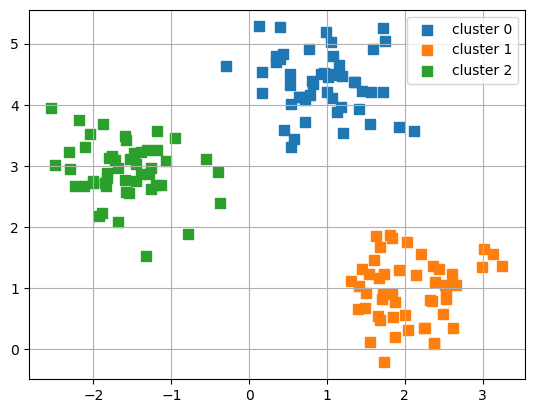

In [11]:
y_hc = ac.fit_predict(X)
plot_clusters(X,y_hc)

## Dendrogram

To identify the right number of clusters we can plot _a dendrogram_. Let's define the function that plots _a dendrogram_:


In [14]:
# define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()


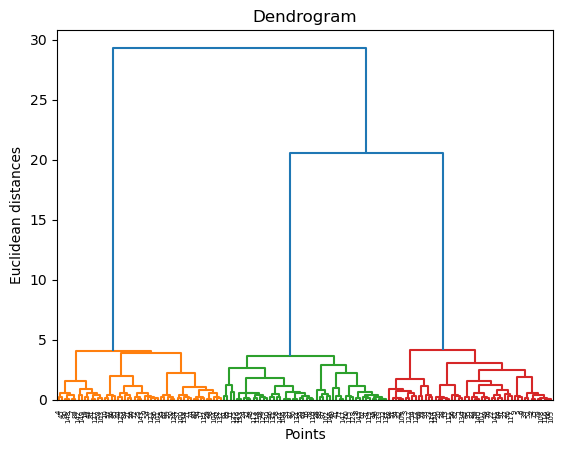

In [15]:
plot_dendrogram(X)

> #### Excersice
> Change the hyper parameters in both fit functions and see the impact of these hyperparameters on the model